In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import random
import shutil
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Bildmetadaten extrahieren

- size: Die Abmessungen des Bildes als (Breite, Höhe).
- mode: Gibt den Farbraum an (RGB, L für Grayscale, etc.).
- file_size_kb: Gibt die Dateigröße in KB zurück

In [2]:
dataset_path = "balanced_dataset" 
image_metadata = []

In [ ]:

# Iteration durch Kategorien und Bilder
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    
    if not os.path.isdir(category_path):
        continue  
    
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        
        # Metadata extrahieren
        try:
            with Image.open(img_path) as img:
                image_metadata.append({
                    "category": category,
                    "filename": img_name,
                    "size": img.size,  # (Breite, Höhe)
                    "mode": img.mode,  # Farbraum, z.B. "RGB" oder "L" (Grayscale)
                    "file_size_kb": os.path.getsize(img_path) / 1024,  # Dateigröße in KB
                })
        except Exception as e:
            print(f"Fehler beim Verarbeiten von {img_path}: {e}")

# Beispielausgabe
for metadata in image_metadata[:5]:  # Nur die ersten 5 Bilder zeigen
    print(metadata)

{'category': 'acinonyx jubatus', 'filename': 'acinonyx jubatus_20110222-PICT6562.JPG', 'size': (3072, 2304), 'mode': 'RGB', 'file_size_kb': 1219.5693359375}
{'category': 'acinonyx jubatus', 'filename': 'acinonyx jubatus_20140107-PICT0076.JPG', 'size': (2816, 2112), 'mode': 'RGB', 'file_size_kb': 1699.0107421875}
{'category': 'acinonyx jubatus', 'filename': 'acinonyx jubatus_20140307-PICT0220.JPG', 'size': (3264, 2448), 'mode': 'RGB', 'file_size_kb': 1235.6826171875}
{'category': 'acinonyx jubatus', 'filename': 'acinonyx jubatus_20140307-PICT0221.JPG', 'size': (3264, 2448), 'mode': 'RGB', 'file_size_kb': 1233.3427734375}
{'category': 'acinonyx jubatus', 'filename': 'acinonyx jubatus_20140307-PICT0222.JPG', 'size': (3264, 2448), 'mode': 'RGB', 'file_size_kb': 1232.267578125}


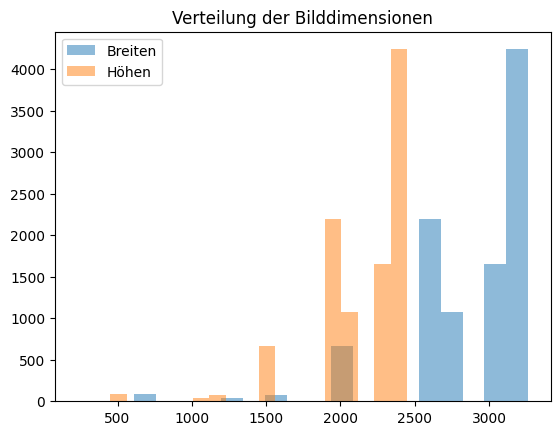

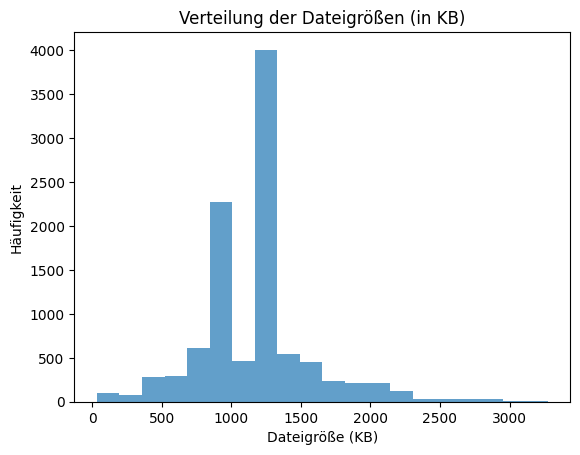

In [4]:
# Verteilung der Bildgrößen
sizes = [metadata["size"] for metadata in image_metadata]
widths = [size[0] for size in sizes]
heights = [size[1] for size in sizes]

plt.hist(widths, bins=20, alpha=0.5, label="Breiten")
plt.hist(heights, bins=20, alpha=0.5, label="Höhen")
plt.legend()
plt.title("Verteilung der Bilddimensionen")
plt.show()

# Verteilung der Dateigrößen
file_sizes = [metadata["file_size_kb"] for metadata in image_metadata]
plt.hist(file_sizes, bins=20, alpha=0.7)
plt.title("Verteilung der Dateigrößen (in KB)")
plt.xlabel("Dateigröße (KB)")
plt.ylabel("Häufigkeit")
plt.show()


In [5]:
# Extrem große oder kleine Dateien identifizieren
outliers = [img for img in image_metadata if img["file_size_kb"] < 5 or img["file_size_kb"] > 5000]
print(f"Anzahl verdächtiger Bilder: {len(outliers)}")
for img in outliers:
    print(f"{img['filename']} in Kategorie {img['category']} mit Dateigröße {img['file_size_kb']} KB")

# kleinste und größte Bildgröße
min_width = min(widths)
max_width = max(widths)
min_height = min(heights)
max_height = max(heights)
print(f"Kleinste Bildbreite: {min_width}px")
print(f"Kleinste Bildhöhe: {min_height}px")
print(f"Größte Bildhöhe: {max_height}px")
print(f"Größte Bildbreite: {max_width}px")

Anzahl verdächtiger Bilder: 0
Kleinste Bildbreite: 314px
Kleinste Bildhöhe: 230px
Größte Bildhöhe: 2448px
Größte Bildbreite: 3264px


In [11]:
# Überprüfen der Farbmodi
color_modes = [img["mode"] for img in image_metadata]
unique_modes = set(color_modes)
print(f"Gefundene Farbräume: {unique_modes}")

# Häufigkeit der verschiedenen Modi
from collections import Counter
mode_counts = Counter(color_modes)
print("Verteilung der Farbräume:")
for mode, count in mode_counts.items():
    print(f"{mode}: {count}")


Gefundene Farbräume: {'RGB'}
Verteilung der Farbräume:
RGB: 10027


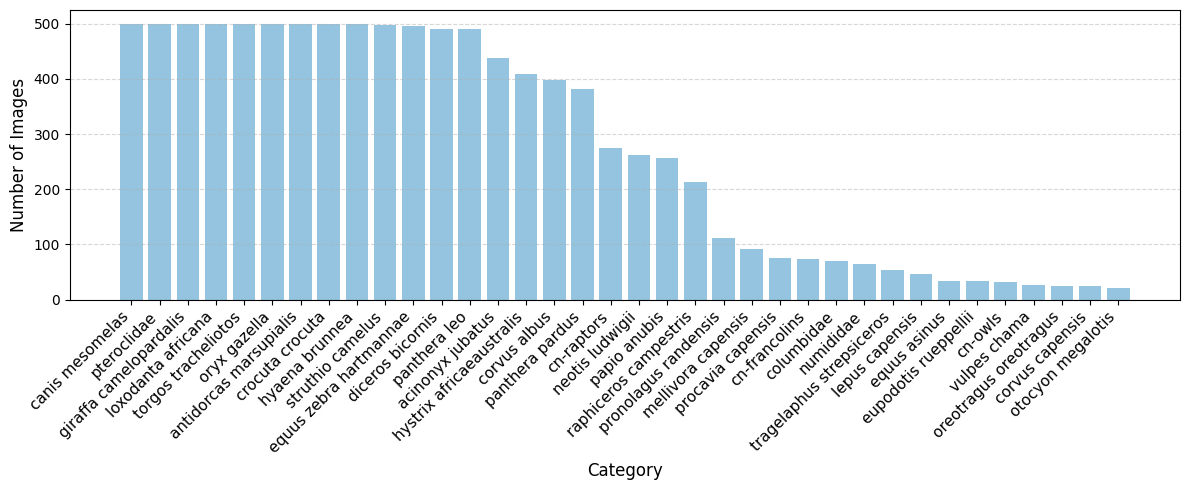

In [3]:
# Anzahl der Bilder je Kategorie zählen
category_counts = {}
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        num_images = len([
            f for f in os.listdir(category_path)
            if f.lower().endswith(('.png', '.jpg', '.jpeg'))
        ])
        category_counts[category] = num_images

# In DataFrame umwandeln und absteigend sortieren
df_counts = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Image Count'])
df_counts = df_counts.sort_values(by='Image Count', ascending=False)

# Einen festen Blauton aus der 'Blues'-Colormap auswählen
blues_cmap = plt.cm.Blues
color = blues_cmap(0.4)  # 0.0 ist sehr helles Blau, 1.0 ist sehr dunkles Blau

# Säulendiagramm erstellen
plt.figure(figsize=(12, 5))
plt.bar(df_counts['Category'], df_counts['Image Count'], color=color)
plt.xticks(rotation=45, ha="right", fontsize=11)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Diagramm als PDF speichern
plt.savefig('figures/category_counts.pdf', format='pdf')

# Diagramm anzeigen
plt.show()

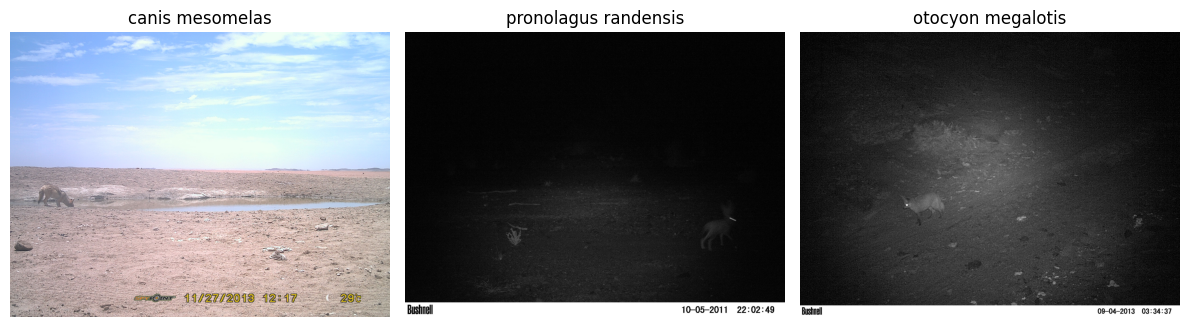

In [8]:
# Beispielhafte Bilder aus den Kategorien CANIS MESOMELAS, PRONOLAGUS RANDENSIS und OTOCYON MEGALOTIS

# Pfad zu deinem Hauptordner
dataset_path = "balanced_dataset"

# Kategorienamen
categories = ["canis mesomelas", "pronolagus randensis", "otocyon megalotis"]

# Liste, um die Bilder zu speichern
images = []

# Hole je ein zufälliges Bild aus jeder Kategorie
for category in categories:
    category_path = os.path.join(dataset_path, category)
    # Alle Bilddateien im Ordner auflisten
    image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    if not image_files:
        raise ValueError(f"No images found in category {category}")
    
    # Zufälliges Bild auswählen
    selected_image = random.choice(image_files)
    image_path = os.path.join(category_path, selected_image)
    
    # Bild öffnen und zur Liste hinzufügen
    images.append(Image.open(image_path))

# Plot erstellen
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for ax, img, category in zip(axs, images, categories):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(category, fontsize=12)

plt.tight_layout()
plt.savefig('example_images_worst.pdf', format='pdf')
plt.show()